# Test the model

Loads the saved model and test it with some data.

In [1]:

import numpy as np
import tensorflow as tf
from utils import datadir

model = tf.keras.models.load_model(datadir("model3"))
model.summary()

2024-01-09 17:20:51.520665: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-01-09 17:20:51.520694: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-01-09 17:20:51.520701: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-01-09 17:20:51.520880: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-09 17:20:51.521218: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 16)]                 0         []                            
                                                                                                  
 cross_product_layer_4 (Cro  (None, 152)                  152       ['input_5[0][0]']             
 ssProductLayer)                                                                                  
                                                                                                  
 repeat_vector_3 (RepeatVec  (None, 2, 152)               0         ['cross_product_layer_4[0][0]'
 tor)                                                               ]                             
                                                                                            

In [2]:
import pandas as pd

input_dataset = pd.read_pickle(datadir("input_rot.pkl"))

## Now try to visualize things

Let's try drawing *tooth*, *bone* and *axe*.

2024-01-09 17:21:01.931215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


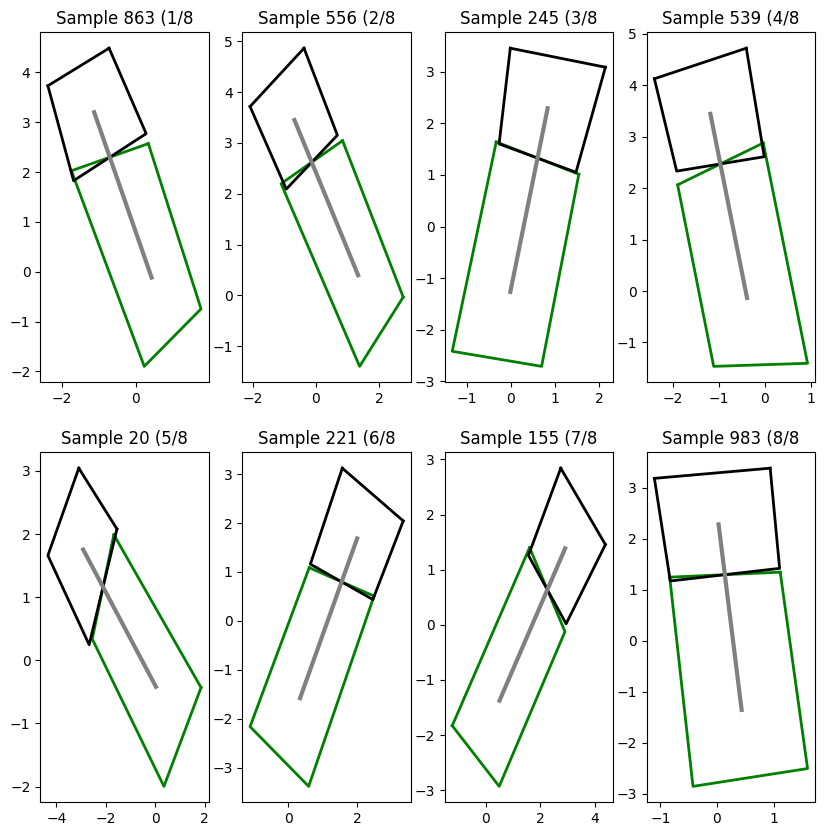

In [3]:

from utils import draw_samples


def apply(row: np.ndarray) -> np.ndarray:
    return model(row.reshape(1, -1)).numpy()


draw_samples(model=None, input_dataset=input_dataset, apply=apply)

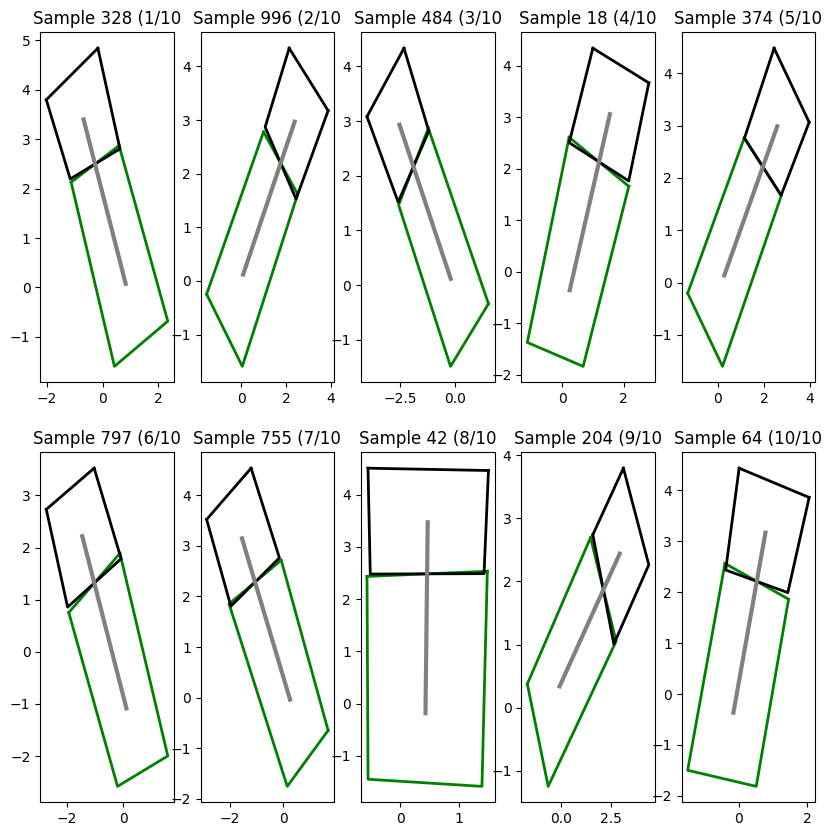

In [4]:
draw_samples(model=None, input_dataset=input_dataset, num_samples=5, apply=apply)

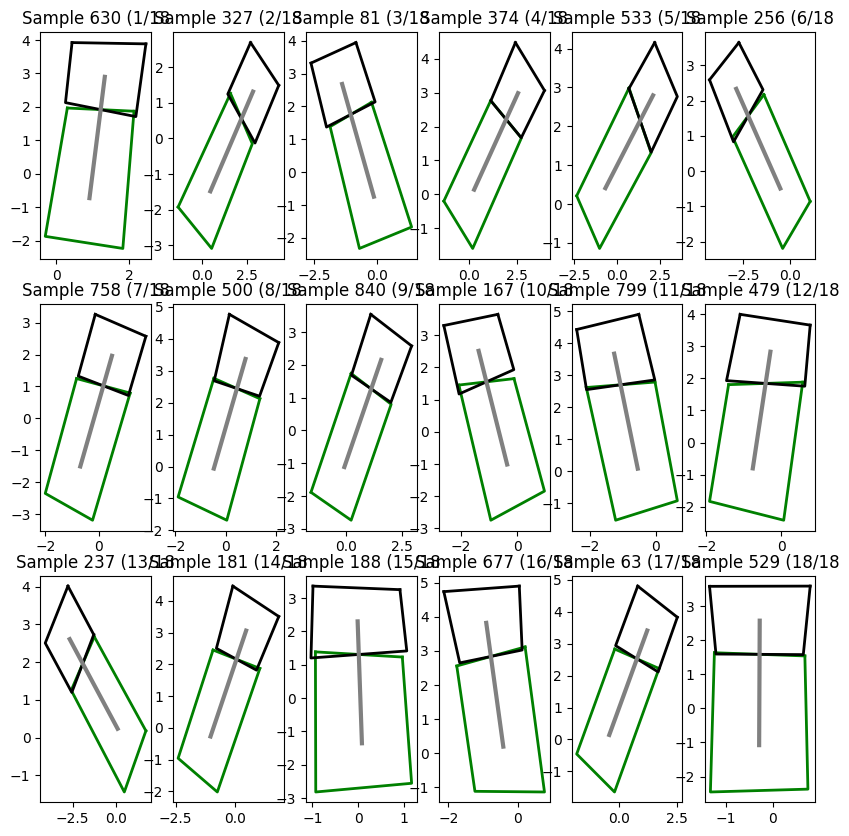

In [5]:
draw_samples(model=None, input_dataset=input_dataset, num_rows=3, num_samples=6, apply=apply)

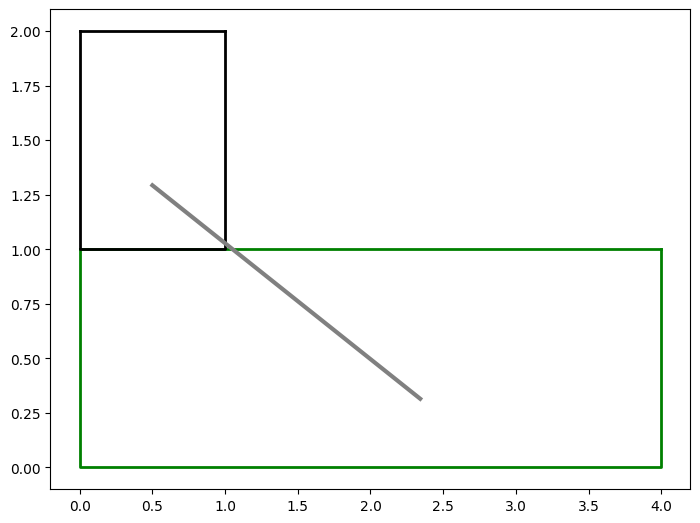

In [6]:
from utils import draw_row
from matplotlib import pyplot as plt

draw_row(model=None,
         ax=plt.figure().add_axes((0., 0., 1., 1.)),
         row=np.array([0, 0, 4, 0, 4, 1, 0, 1,  # bone
                       0, 1, 1, 1, 1, 2, 0, 2]),
         apply=apply)